In [2]:
from __future__ import division
%matplotlib inline
import numpy as np
import pandas as pd
import scipy
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import statsmodels.api as sm
import math


# turn of data table rendering
pd.set_option('display.notebook_repr_html', False)

sns.set_palette(['#00A99D', '#F5CA0C', '#B6129F', '#76620C', '#095C57'])
np.version.full_version

'1.16.1'

## Data
We have collected samples of the wine prices of two fictitious online liquorstores, bestliqs.com and cheapliq.com.

In [3]:
bestliqs_wine_prices = pd.Series(
    [9, 5, 6, 11, 8, 5, 7, 13, 12, 13, 9, 8, 10, 6, 11, 9, 7, 12])
cheapliq_wine_prices = pd.Series(
    [11, 10, 12, 9, 8, 13, 14, 15, 12, 11, 13, 8, 9, 11])

data = pd.DataFrame({'bestliqs': bestliqs_wine_prices, 
                     'cheapliq': cheapliq_wine_prices})
data.describe()

        bestliqs   cheapliq
count  18.000000  14.000000
mean    8.944444  11.142857
std     2.645134   2.178819
min     5.000000   8.000000
25%     7.000000   9.250000
50%     9.000000  11.000000
75%    11.000000  12.750000
max    13.000000  15.000000

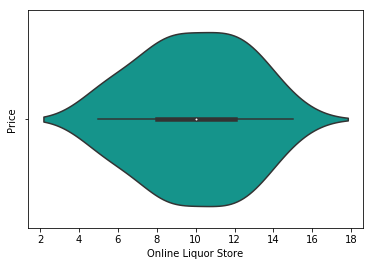

In [4]:
sns.violinplot(data.dropna())
plt.xlabel('Online Liquor Store')
plt.ylabel('Price')
plt.show()

## Question and hypothesis
Well, it looks like cheapliq.com isn't as cheap as they say. However, is the difference statistically significant? We don't want to spend too much on the first batch of wine for our new cellar. Which online liquor store to choose if we want to decide on the lowest mean wine price?

|Hypothesis||$\alpha = .05$|
|---:|:---:|---|:---|
|$H_0:$|$\mu_{best} = \mu_{cheap}$|There is no significant difference in mean wine prices|
|$H_a:$|$\mu_{best} \neq \mu_{cheap}$|There is a significant difference in mean wine prices|

## Independent Samples t-test

In [5]:
# First find out what the mean prices are
xbar_best = data.bestliqs.mean()
xbar_cheap = data.cheapliq.mean()
xbar_best, xbar_cheap

(8.944444444444445, 11.142857142857142)

In [6]:
# Then we get the sample standard devation for each liquor store
s_best = data.bestliqs.std(ddof=1)
s_cheap = data.cheapliq.std(ddof=1)
s_best, s_cheap

(2.6451336499586917, 2.1788191176076888)

## The Standard Error of the Mean
To calculate the standard error of the mean combined for both independent wine price samples, we need to use the following formula:

$$sem=\sqrt{\frac{s_{best}^2}{n_{best}}+\frac{s_{cheap}^2}{n_{cheap}}}$$


In [7]:
# Calculate the standard error of the mean combined
n_best = data.bestliqs.count()
n_cheap = data.cheapliq.count()
sem = math.sqrt(s_best ** 2 / n_best + 
                s_cheap ** 2 / n_cheap)
sem

0.8531100847677227

In [8]:
# Now calculate the t-statistic
t = (xbar_best - xbar_cheap) / sem
t

-2.5769390582356815

In [9]:
# Get the criotical values for a two-tailed test at alpha .05
alpha = .05
dof = n_best + n_cheap - 2  # for both samples combined
t_critical = stats.t.ppf(alpha / 2, dof)  # two sided
t_critical

-2.042272456301238

## Hypothesis testing

In [10]:
# Test our alternative hypothesis
t < t_critical or t > -t_critical

True

In [11]:
# Another way to test the alternative hypothesis by comparing 
# the probability of getting this mean with the alpha level.
p = stats.t.sf(abs(t), dof) * 2  # two sided
p

0.01512946515275131

In [12]:
p < alpha

True

Based on these result, we conclude that the difference in mean wine price is not due to random chance or variation in the samples. Therefor we will reject the null hypothesis. Bestliqs.com is, on average, the better choice for the better wine price. Note there is a 5% chance (1 - alpha) on commiting a type I error in which the null hypothesis is true, but was rejected.

## Using scipy.stats or statsmodels

In [13]:
# A quicker way to get these results is to call scipy stats
# ttest_ind on both samples for unequal variances
# equal_var False makes it effectively Welch's t-test
t_statistic, p = stats.ttest_ind(data.bestliqs, data.cheapliq.dropna(), 
                                 equal_var=False)
t_statistic, p

(-2.576939058235681, 0.01515351938249531)

In [14]:
# Another alternative is using Statsmodels
t_statistic, p, dof = sm.stats.ttest_ind(data.bestliqs, data.cheapliq.dropna(), 
                   alternative='two-sided', usevar='unequal')
t_statistic, p, dof

(-2.576939058235681, 0.01515351938249531, 29.87088618850303)